In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
pd.set_option("display.max_columns", 50)

In [2]:
# Making dataframe from clean data
df = pd.read_csv("../clean_data/clean_victimization_data.csv")
df

,Year,Weight,Sex,Race,Hispanic origin,Race/Hispanic origin,Age,Marital status,Household income,Population size,Region,Location of residence,Victim-offender relationship,Reporting to the police,Presence of Weapon,Weapon category,Aggregate type of crime,Type of crime,Violent crime excluding simple assault,Injury,Medical treatment for physical injuries,Victim services,Location of incident
0,1995,3463.13071,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Never married,"50,000 to 74,999","250,000 to 499,999",West,Urban,Stanger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Robbery,Violent crime excluding simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
1,1995,2497.65395,Female,White,Non-Hispanic,Non-Hispanic white,35 to 49,Married,"50,000 to 74,999","Under 100,000",Midwest,Suburban,Stanger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
2,1995,2521.20834,Female,Black,Non-Hispanic,Non-Hispanic black,25 to 34,Never married,"50,000 to 74,999","Under 100,000",Midwest,Suburban,Stanger,"Yes, reported to the police","Yes, offender had weapon",Knife,Violent victimization,Aggravated assault,Violent crime excluding simple assault,Not injured,Not injured,No services received from victim service agencies,"At or near friend, neighbor, or relative's home"
3,1995,2023.97373,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"25,000 to 34,999",Not a place,South,Suburban,Stanger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
4,1995,12143.84238,Male,White,Non-Hispanic,Non-Hispanic white,25 to 34,Married,"25,000 to 34,999",Not a place,South,Suburban,Stanger,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,"Commercial place, parking lot, or other public..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44700,2018,4923.72993,Female,White,Hispanic,Hispanic,15 to 17,Never married,"75,000 or more","Under 100,000",South,Suburban,Do not know number of offenders,"No, did not report to the police",Do not know if offender had weapon,Do not know if offender had weapon,Personal theft/larceny,Personal theft,Personal theft,Not injured,Not injured,No services received from victim service agencies,School
44701,2018,2570.47232,Male,Black,Non-Hispanic,Non-Hispanic black,50 to 64,Married,"50,000 to 74,999","Under 100,000",South,Suburban,Do not know relationship,"No, did not report to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Not injured,Not injured,No services received from victim service agencies,At or near victim's home
44702,2018,2224.65724,Female,White,Non-Hispanic,Non-Hispanic white,35 to 49,Separated,"75,000 or more","Under 100,000",Northeast,Suburban,Intimates,"Yes, reported to the police","No, offender did not have weapon",No weapon,Violent victimization,Simple assault,Simple assault,Injured,Not treated for injury,Services received from victim service agencies,At or near victim's home
44703,2018,1676.22725,Male,Black,Non-Hispanic,Non-Hispanic black,65 or older,Widowed,"35,000 to 49,999","Under 100,000",South,Rural,Well-known/casual acquaintances,"Yes, reported to the police","Yes, offender had weapon",Knife,Violent victimization,Aggravated assault,Violent crime excluding simple assault,Injured,Not treated for injury,Services received from vic

In [3]:
df['Age'].unique()

array(['25 to 34', '35 to 49', '18 to 20', '12 to 14', '21 to 24',
       '50 to 64', '15 to 17', '65 or older'], dtype=object)

In [4]:
# Making dataframe from income count for first age range
kid = df[df['Age'] == '12 to 14']
kid_hincome = kid['Household income'].value_counts()
kid_hincome = kid_hincome.drop(kid_hincome.index[3])
kid_df = kid_hincome.to_frame().reset_index()
kid_df

,index,Household income
0,"75,000 or more",732
1,"35,000 to 49,999",644
2,"50,000 to 74,999",631
3,"15,000 to 24,999",551
4,"25,000 to 34,999",537
5,"7,500 to 14,999",424
6,"Less than 7,500",207


In [5]:
# Second age range
teen = df[df['Age'] == '15 to 17']
teen_hincome = teen['Household income'].value_counts()
teen_hincome = teen_hincome.drop(teen_hincome.index[3])
teen_df = teen_hincome.to_frame().reset_index()
teen_df

,index,Household income
0,"75,000 or more",652
1,"50,000 to 74,999",607
2,"35,000 to 49,999",548
3,"15,000 to 24,999",497
4,"25,000 to 34,999",487
5,"7,500 to 14,999",358
6,"Less than 7,500",205


In [6]:
# Third age range
youth = df[df['Age'] == '18 to 20']
youth_hincome = youth['Household income'].value_counts()
youth_hincome = youth_hincome.drop(youth_hincome.index[1])
youth_df = youth_hincome.to_frame().reset_index()
youth_df

,index,Household income
0,"Less than 7,500",705
1,"15,000 to 24,999",497
2,"75,000 or more",467
3,"7,500 to 14,999",457
4,"25,000 to 34,999",416
5,"50,000 to 74,999",382
6,"35,000 to 49,999",371


In [7]:
# Fourth age range
early_twenties = df[df['Age'] == '21 to 24']
early_twenties_hincome = early_twenties['Household income'].value_counts()
early_twenties_hincome = early_twenties_hincome.drop(early_twenties_hincome.index[0])
early_twenties_df = early_twenties_hincome.to_frame().reset_index()
early_twenties_df

,index,Household income
0,"15,000 to 24,999",627
1,"7,500 to 14,999",579
2,"25,000 to 34,999",577
3,"Less than 7,500",505
4,"35,000 to 49,999",491
5,"75,000 or more",444
6,"50,000 to 74,999",400


In [8]:
# Fifth age range
twenties_to_thirties = df[df['Age'] == '25 to 34']
ttt_hincome = twenties_to_thirties['Household income'].value_counts()
ttt_hincome = ttt_hincome.drop(ttt_hincome.index[0])
ttt_df = ttt_hincome.to_frame().reset_index()
ttt_df

,index,Household income
0,"35,000 to 49,999",1340
1,"15,000 to 24,999",1240
2,"50,000 to 74,999",1240
3,"25,000 to 34,999",1183
4,"75,000 or more",1140
5,"7,500 to 14,999",908
6,"Less than 7,500",741


In [9]:
# Sixth age range
thirties_to_fourties = df[df['Age'] == '35 to 49']
ttf_hincome = thirties_to_fourties['Household income'].value_counts()
ttf_hincome = ttf_hincome.drop(ttf_hincome.index[1])
ttf_df = ttf_hincome.to_frame().reset_index()
ttf_df

,index,Household income
0,"75,000 or more",2014
1,"50,000 to 74,999",1559
2,"35,000 to 49,999",1521
3,"15,000 to 24,999",1214
4,"25,000 to 34,999",1197
5,"7,500 to 14,999",1147
6,"Less than 7,500",737


In [10]:
# Seventh age range
fifties_to_sixties = df[df['Age'] == '50 to 64']
fts_hincome = fifties_to_sixties['Household income'].value_counts()
fts_hincome = fts_hincome.drop(fts_hincome.index[1])
fts_df = fts_hincome.to_frame().reset_index()
fts_df

,index,Household income
0,"75,000 or more",1244
1,"50,000 to 74,999",814
2,"35,000 to 49,999",645
3,"7,500 to 14,999",643
4,"15,000 to 24,999",587
5,"25,000 to 34,999",520
6,"Less than 7,500",461


In [11]:
# Last age range
senior = df[df['Age'] == '65 or older']
senior_hincome = senior['Household income'].value_counts()
senior_hincome = senior_hincome.drop(senior_hincome.index[0])
senior_df = senior_hincome.to_frame().reset_index()
senior_df

,index,Household income
0,"7,500 to 14,999",257
1,"15,000 to 24,999",252
2,"75,000 or more",181
3,"35,000 to 49,999",178
4,"25,000 to 34,999",174
5,"50,000 to 74,999",117
6,"Less than 7,500",114


In [12]:
# Sorting out df of last age range to order incomes from greatest to least
sorder = [6, 5, 1, 3, 4, 2, 7]
senior_df['order'] = sorder
senior_sorted = senior_df.sort_values('order')

senior_sorted = senior_sorted.reset_index()
senior_sorted = senior_sorted.drop('level_0', axis=1)
senior_sorted = senior_sorted.drop('order', axis=1)
senior_sorted

In [14]:
df.Age.unique()

array(['25 to 34', '35 to 49', '18 to 20', '12 to 14', '21 to 24',
       '50 to 64', '15 to 17', '65 or older'], dtype=object)

In [15]:
# A bunch of merging and renaming
combined_ages = senior_sorted.merge(fts_df, on='index')
combined_ages = combined_ages.rename(columns={'Household income_x':'65 or older', 'Household income_y':'50 to 64'})
combined_ages = combined_ages.merge(ttf_df, on='index')
combined_ages = combined_ages.rename(columns={'Household income':'35 to 49'})
combined_ages = combined_ages.merge(ttt_df, on='index')
combined_ages = combined_ages.rename(columns={'Household income':'25 to 34'})
combined_ages = combined_ages.merge(early_twenties_df, on='index')
combined_ages = combined_ages.rename(columns={'Household income':'21 to 24'})
combined_ages = combined_ages.merge(youth_df, on='index')
combined_ages = combined_ages.rename(columns={'Household income':'18 to 20'})
combined_ages = combined_ages.merge(teen_df, on='index')
combined_ages = combined_ages.rename(columns={'Household income':'15 to 17'})
combined_ages = combined_ages.merge(kid_df, on='index')
combined_ages = combined_ages.rename(columns={'index':'Household income', 'Household income':'12 to 14'})
combined_ages

,Household income,65 or older,50 to 64,35 to 49,25 to 34,21 to 24,18 to 20,15 to 17,12 to 14
0,"75,000 or more",181,1244,2014,1140,444,467,652,732
1,"50,000 to 74,999",117,814,1559,1240,400,382,607,631
2,"35,000 to 49,999",178,645,1521,1340,491,371,548,644
3,"25,000 to 34,999",174,520,1197,1183,577,416,487,537
4,"15,000 to 24,999",252,587,1214,1240,627,497,497,551
5,"7,500 to 14,999",257,643,1147,908,579,457,358,424
6,"Less than 7,500",114,461,737,741,505,705,205,207


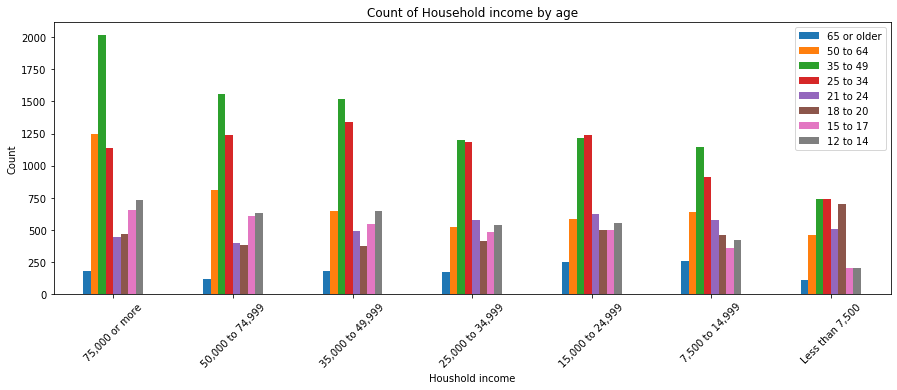

In [19]:
# Creating bar chart and saving image
ca_bar = combined_ages.plot(kind='bar', figsize=(15,5))
ca_bar.set_xticklabels(combined_ages['Household income'], rotation=45)
ca_bar.set_title('Count of Household income by age')
ca_bar.set_xlabel('Houshold income')
ca_bar.set_ylabel('Count')
ca_bar
plt.savefig('household_income_by_age')
plt.show()